# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [31]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

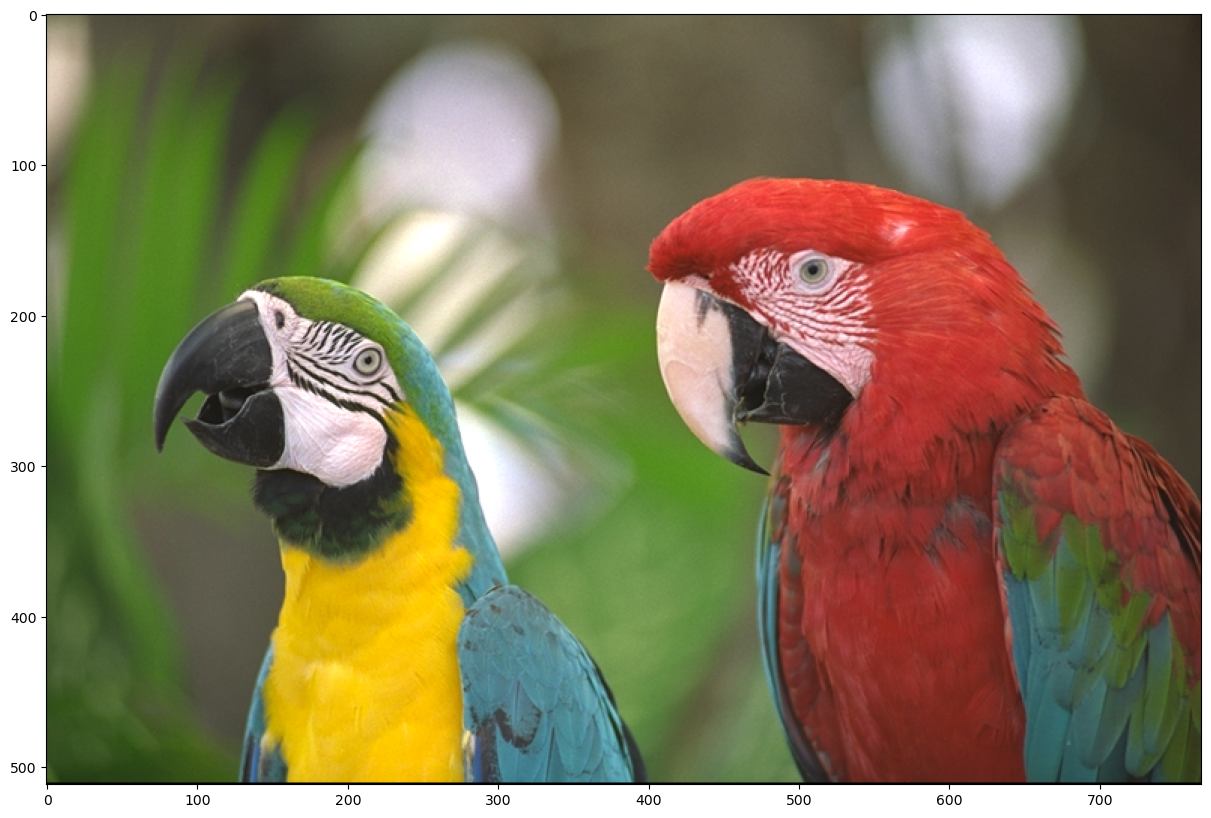

In [32]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [33]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [34]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[0]
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

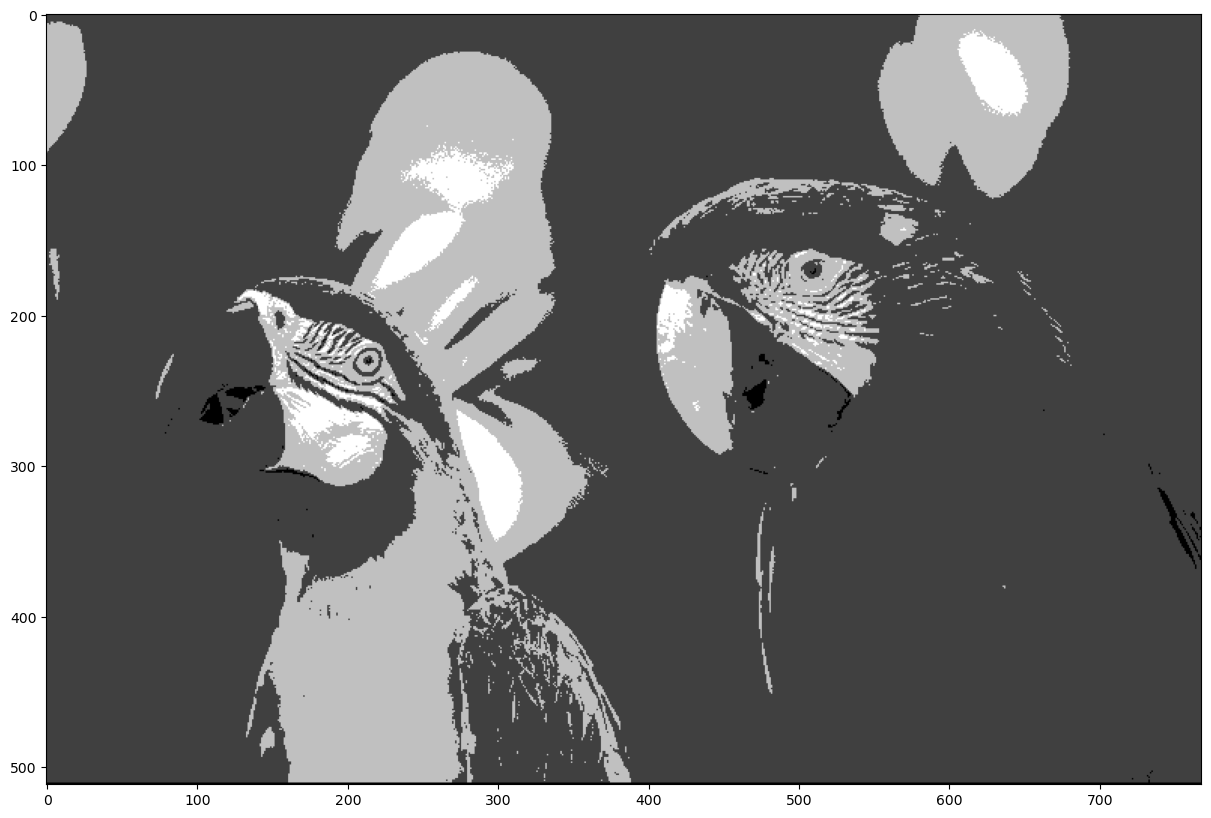

In [35]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [36]:
# Compute average quantization error

def psnr(ref, target):
    error = ref.astype(np.float32) - target.astype(np.float32)
    mse = np.mean(error**2)
    return 10 * np.log10((255**2)/mse)

print('PSNR', psnr(img, quantized), 'dB')

PSNR 14.826061453276782 dB


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [51]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = list(img[r, c, :])

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color      
        
        # Compute quantization error
        quant_error = np.array(pixel) - np.array(new_pixel)

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r    , c    , :] = new_pixel
        
        # Apply dithering
        dithering[r, c] = new_pixel
        
        pixel = img_tmp[r + 1, c    , :] + quant_error * 7 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r + 1, c    , :] = new_pixel
        
        pixel = img_tmp[r - 1, c + 1, :] + quant_error * 3 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r - 1, c + 1, :] = new_pixel
        
        pixel = img_tmp[r    , c + 1, :] + quant_error * 5 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r    , c + 1, :] = new_pixel
        
        pixel = img_tmp[r + 1, c + 1, :] + quant_error * 1 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r + 1, c + 1, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x7f4538e4f3d0>)

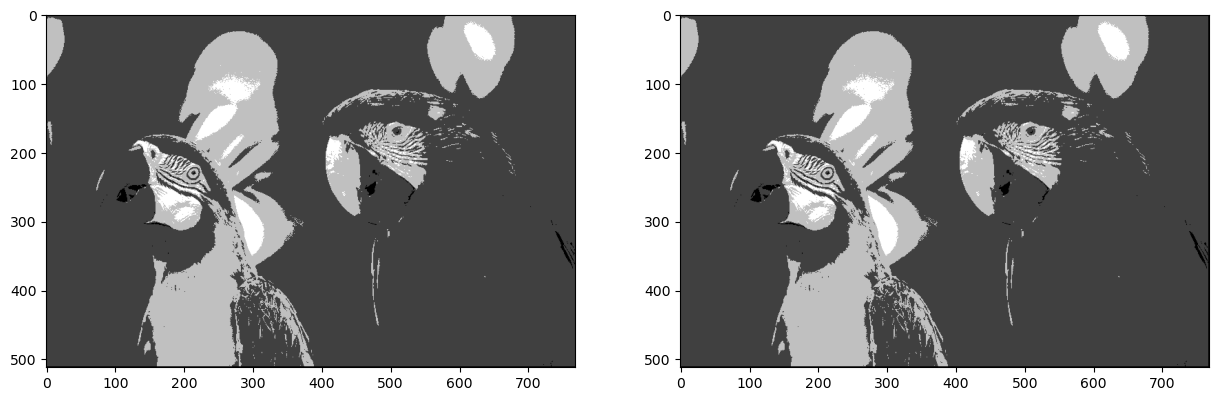

In [54]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(img_tmp.astype(np.uint8))     # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [55]:
# Compute average quantization error for dithered image

print('PSNR optimally quantized', psnr(img, img_tmp), 'dB')
print('PSNR dithering', psnr(img, dithering), 'dB')

PSNR optimally quantized 14.828749298235508 dB
PSNR dithering 14.755550010562636 dB


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?

Quantization error was 
14.827909167975255 dB for Optimally quantized and 14.755550010562636 dB for dithered.

So, for Optimally quantized has higher

* Which image looks better to you?

I tried to implement Floyd-Steinberg Dithering algo as in wiki, but there were colored pixels. There was discussion in Slak, that we need to work in out palette, so i used algo and than found nearest colour.
Dithered looks better, but i think i did not understand how to use it for grayed pictures and which results should i get in this key


(<Axes: >, <matplotlib.image.AxesImage at 0x7f4597d8d2a0>)

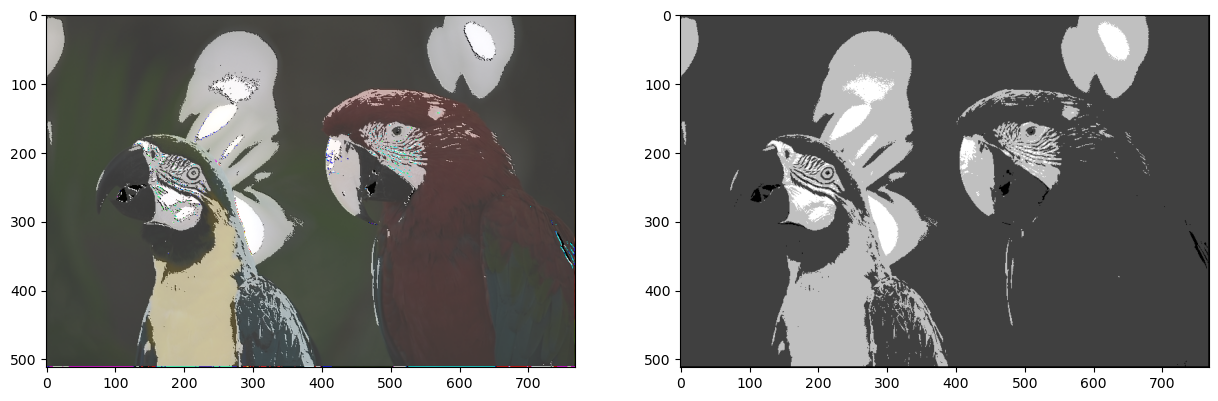

In [13]:
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = list(img[r, c, :])

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color      
        
        # Compute quantization error
        quant_error = np.array(pixel) - np.array(new_pixel)

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r    , c    , :] = new_pixel
        
        # Apply dithering
        dithering[r, c] = new_pixel
    
        img_tmp[r + 1, c    , :] = img_tmp[r + 1, c    , :] + quant_error * 7 / 16
        img_tmp[r - 1, c + 1, :] = img_tmp[r - 1, c + 1, :] + quant_error * 3 / 16
        img_tmp[r    , c + 1, :] = img_tmp[r    , c + 1, :] + quant_error * 5 / 16
        img_tmp[r + 1, c + 1, :] = img_tmp[r + 1, c + 1, :] + quant_error * 1 / 16
        
plt.subplot(121), plt.imshow(img_tmp.astype(np.uint8))     # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

* Can you repeat the same process using only two colours: black and white? Show me :-)

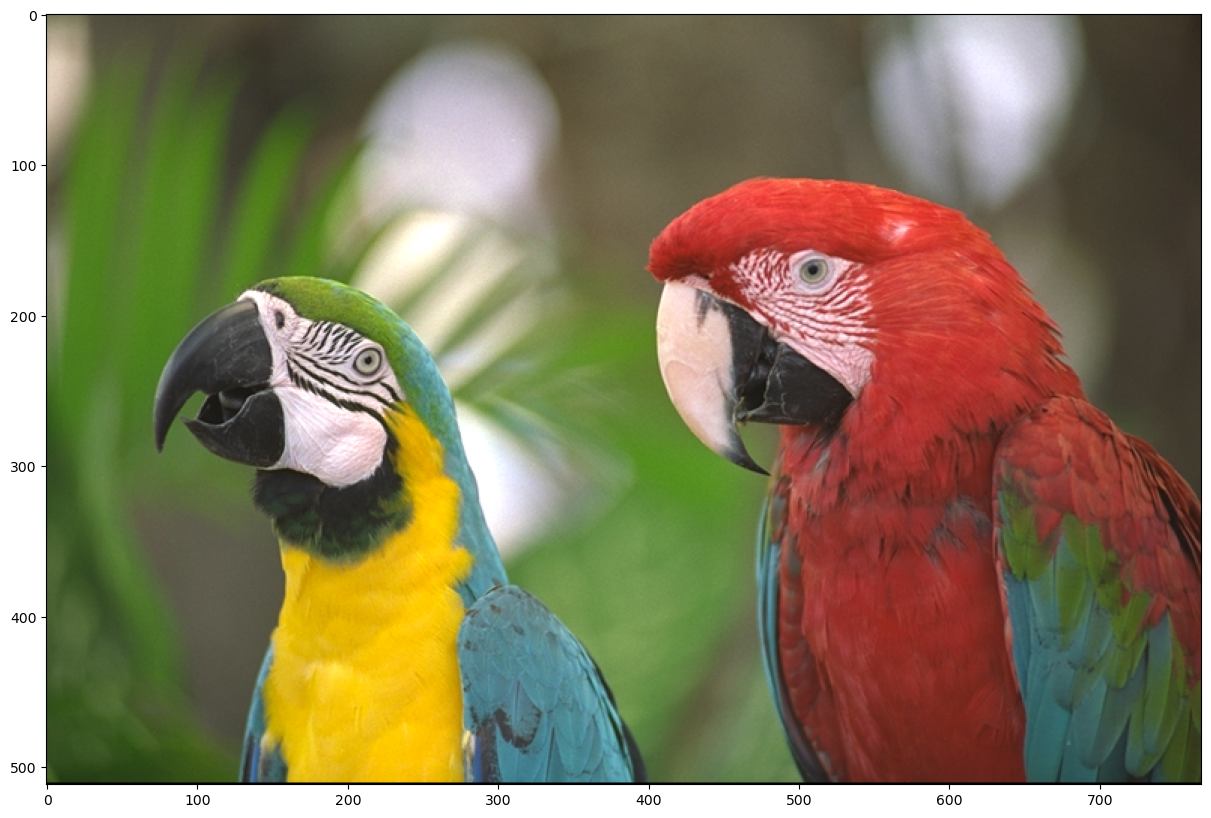

In [14]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

In [15]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [255, 255, 255]])

In [16]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[0]
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

PSNR 8.787833619841734 dB


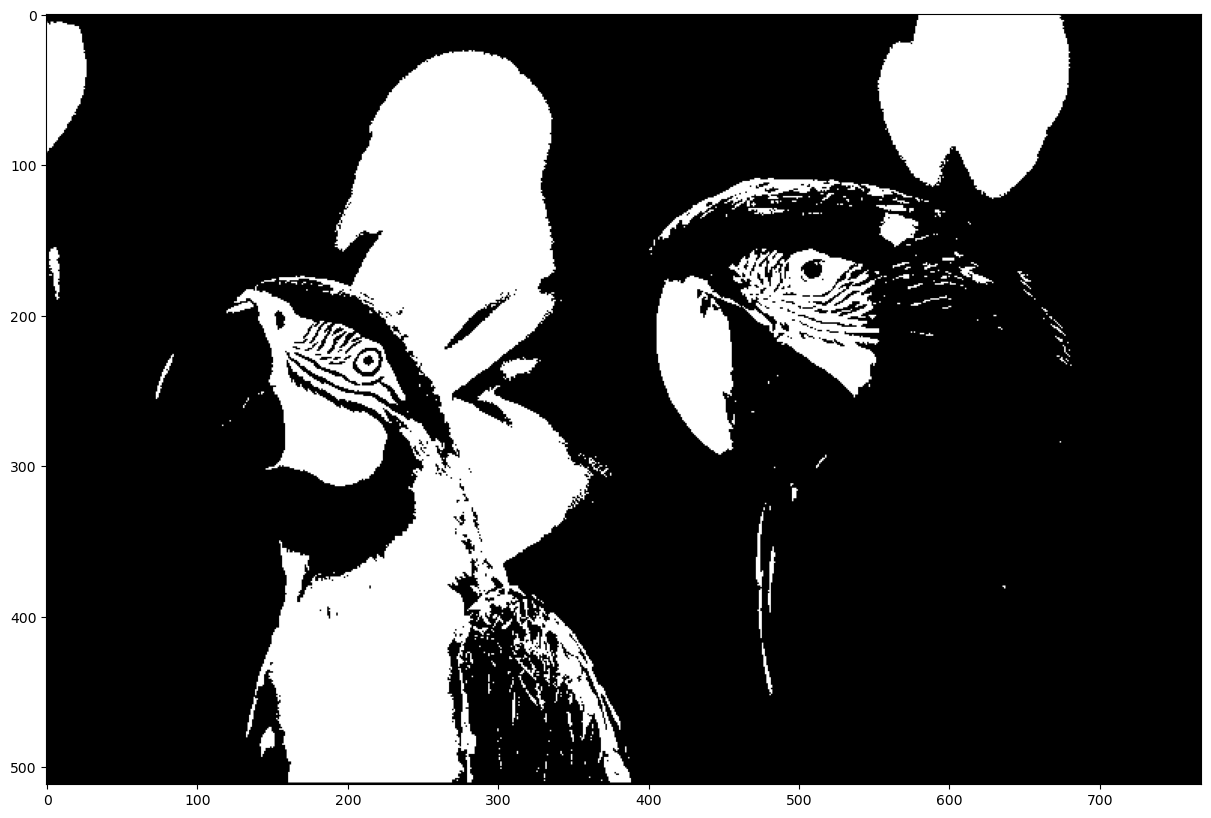

In [17]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

print('PSNR', psnr(img, quantized), 'dB')

In [18]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = list(img[r, c, :])

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color      
        
        # Compute quantization error
        quant_error = np.array(pixel) - np.array(new_pixel)

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r    , c    , :] = new_pixel
        
        # Apply dithering
        dithering[r, c] = new_pixel
        
        pixel = img_tmp[r + 1, c    , :] + quant_error * 7 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r + 1, c    , :] = new_pixel
        
        pixel = img_tmp[r - 1, c + 1, :] + quant_error * 3 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r - 1, c + 1, :] = new_pixel
        
        pixel = img_tmp[r    , c + 1, :] + quant_error * 5 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r    , c + 1, :] = new_pixel
        
        pixel = img_tmp[r + 1, c + 1, :] + quant_error * 1 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r + 1, c + 1, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x7f4543e27970>)

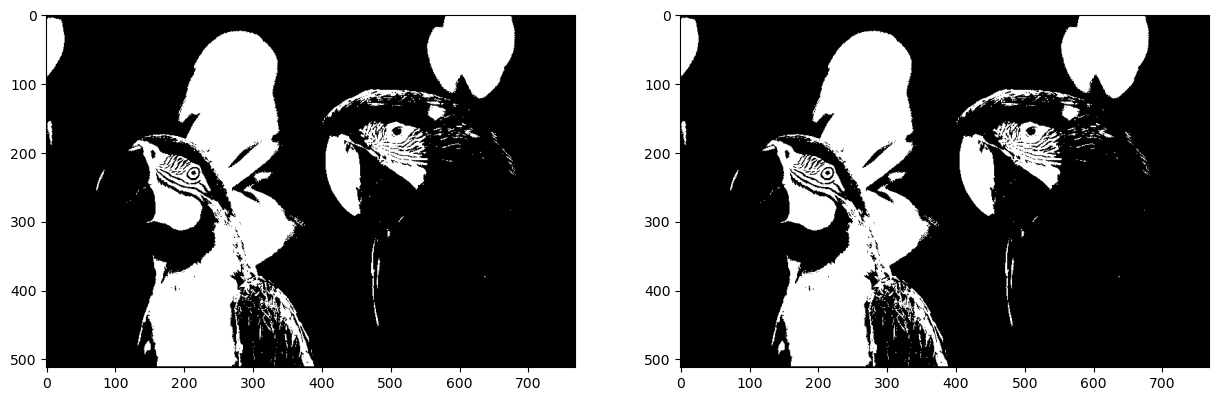

In [19]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(img_tmp.astype(np.uint8))     # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [20]:
# Compute average quantization error for dithered image

print('PSNR optimally quantized', psnr(img, img_tmp), 'dB')
print('PSNR dithering', psnr(img, dithering), 'dB')

PSNR optimally quantized 8.791997825025664 dB
PSNR dithering 8.781916027209391 dB


There is very small difference in PSNR and visual effect for optimally quantized and dithering for 2 coloured palette

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_

/home/elena/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


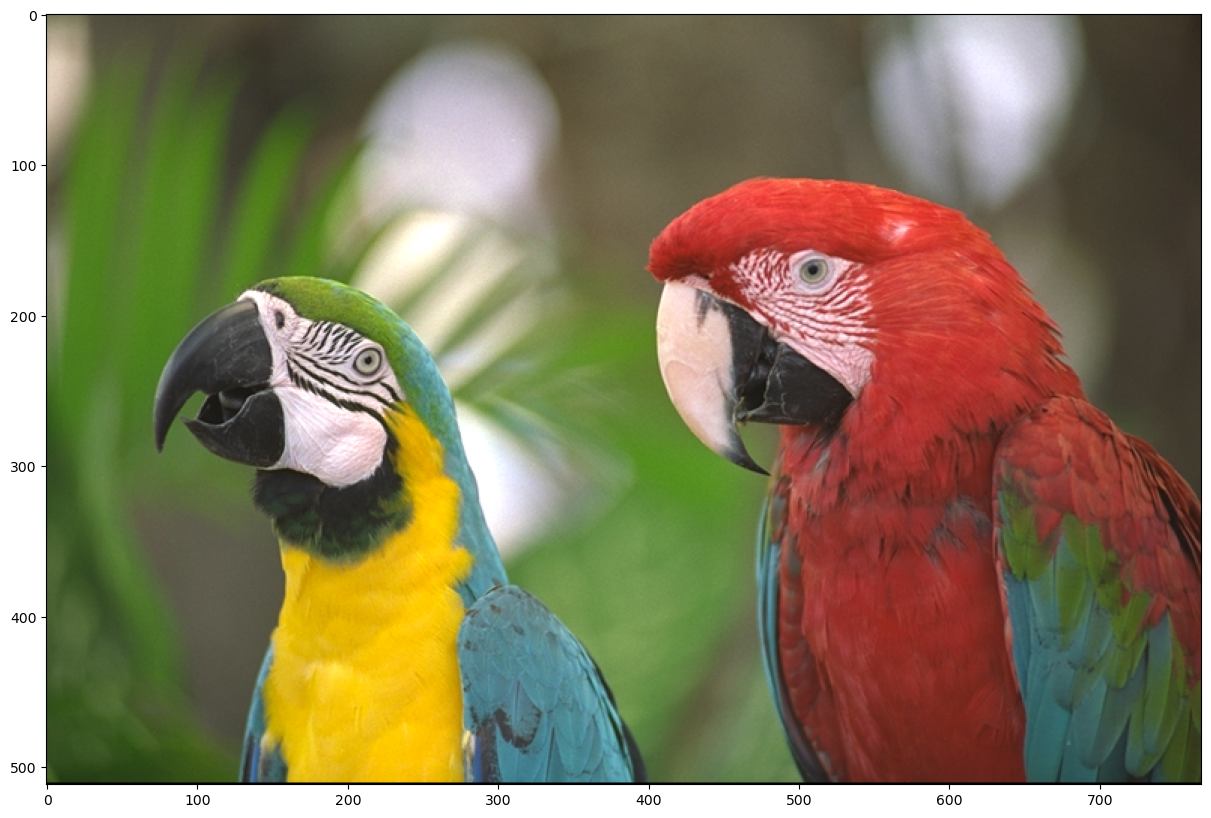

In [22]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

In [23]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[0]
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

PSNR 17.115543765903332 dB


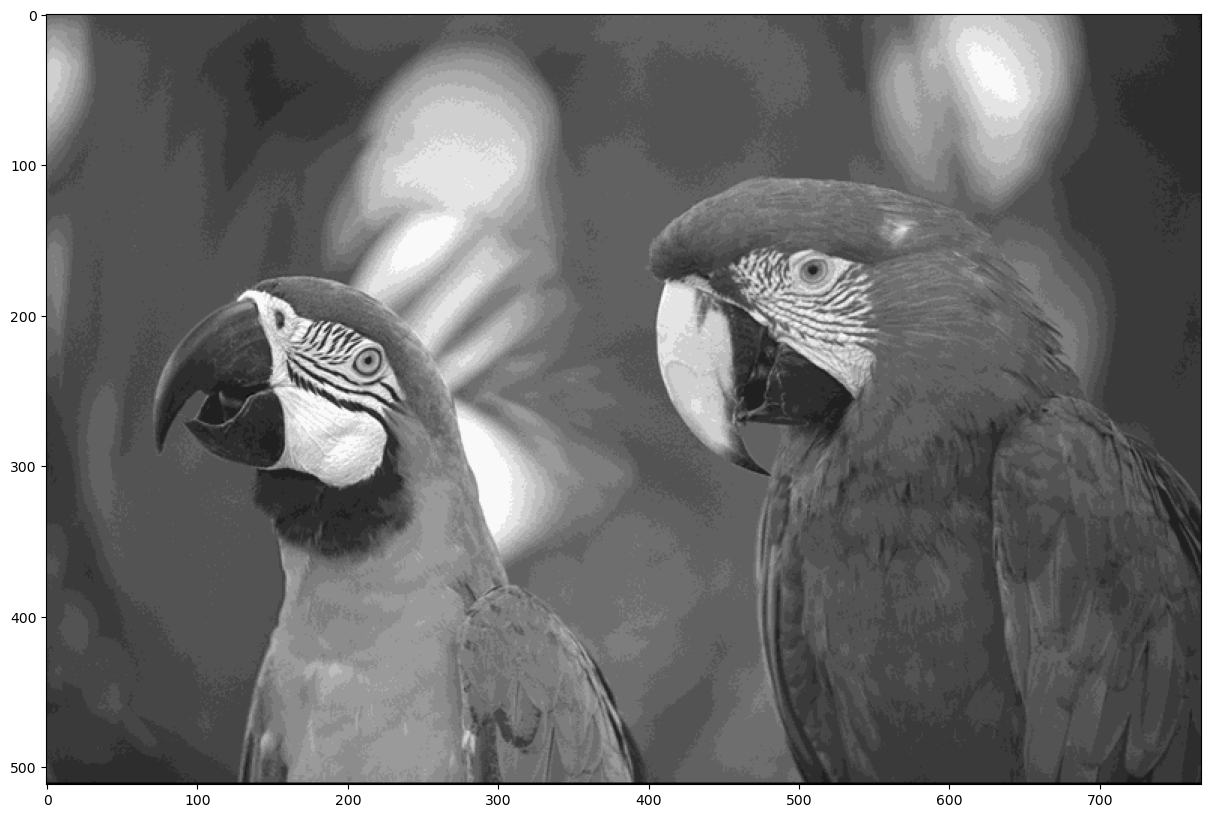

In [24]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

print('PSNR', psnr(img, quantized), 'dB')

In [25]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = list(img[r, c, :])

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color      
        
        # Compute quantization error
        quant_error = np.array(pixel) - np.array(new_pixel)

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r    , c    , :] = new_pixel
        
        # Apply dithering
        dithering[r, c] = new_pixel
        
        pixel = img_tmp[r + 1, c    , :] + quant_error * 7 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r + 1, c    , :] = new_pixel
        
        pixel = img_tmp[r - 1, c + 1, :] + quant_error * 3 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r - 1, c + 1, :] = new_pixel
        
        pixel = img_tmp[r    , c + 1, :] + quant_error * 5 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r    , c + 1, :] = new_pixel
        
        pixel = img_tmp[r + 1, c + 1, :] + quant_error * 1 / 16
        new_pixel = colors
        min_distance = 10e9
        for color in colors:
            distance = np.linalg.norm(pixel - color)
            if (distance < min_distance).all():
                min_distance = distance
                new_pixel = color
        img_tmp[r + 1, c + 1, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x7f45397c1240>)

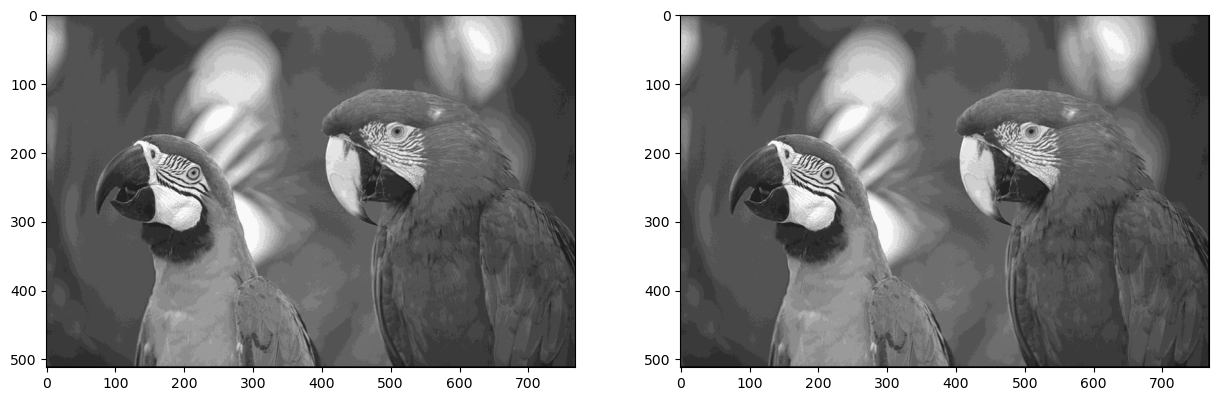

In [26]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(img_tmp.astype(np.uint8))     # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [27]:
# Compute average quantization error for dithered image

print('PSNR optimally quantized', psnr(img, img_tmp), 'dB')
print('PSNR dithering', psnr(img, dithering), 'dB')

PSNR optimally quantized 17.11715125312482 dB
PSNR dithering 16.989644196111055 dB


Apply FS dithering the same way you did before.
* How does the result look like to you?

This is the best result compared to other attempts.

* What happens if we use 32 colours?

The picture will look better: finer details will be visible, but the weight of the picture will be greater.

* And what happens if we use 256 colours?

The picture will be very detailed